In [1]:
import json
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder

In [2]:
df = pd.read_csv('../merged_1.6.1.csv')

data = []
labels = []
#
inputs = ['RAD51B', 'FANCA', 'NBN', 'POLQ', 'PRKDC', 'BRCA1']

In [3]:
for gene in inputs:
    print(gene)
    geneDF, chromsome = parser.getGeneDF(gene)

    geneData = []

    for index, row in geneDF.iterrows():
        if (int(row['seqnames']) == chromsome) and (int(row['altchr']) == chromsome):
            geneData.append(int(row['altpos']) - int(row['start']))

    data.append(geneData)
    labels.append(gene)

RAD51B
FANCA
NBN
POLQ
PRKDC
BRCA1


In [4]:
stats.f_oneway(data[0],data[1],data[2],data[3],data[4],data[5])

F_onewayResult(statistic=7.427644609932401, pvalue=1.861461771510765e-06)

Text(0.815, 0.013, ' Average Value')

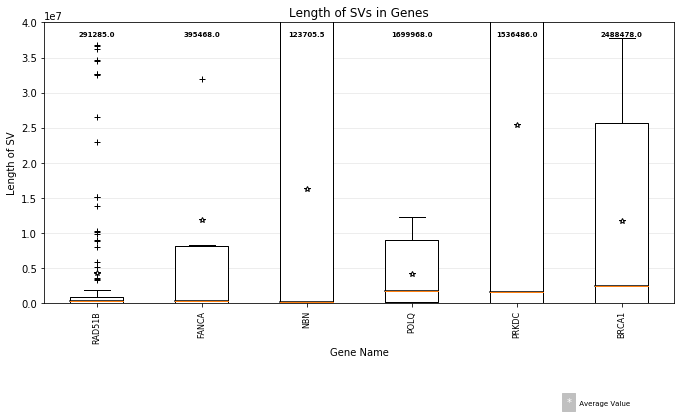

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title(
    'Length of SVs in Genes')
ax1.set_xlabel('Gene Name')
ax1.set_ylabel('Length of SV')

# Now fill the boxes with desired colors
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor='white'))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40000000
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(labels,
                    rotation=90, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color='black')

# Finally, add a basic legend
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

In [6]:
for i in range(1, len(labels)):
    label = labels[i]
    print(f"p-value for RAD51B and {label}: {stats.ttest_ind(data[0], data[i])}")

p-value for RAD51B and FANCA: Ttest_indResult(statistic=-2.5462531322344546, pvalue=0.011870374244320237)
p-value for RAD51B and NBN: Ttest_indResult(statistic=-3.353358665271791, pvalue=0.0010220277081042428)
p-value for RAD51B and POLQ: Ttest_indResult(statistic=0.02600049423574568, pvalue=0.9792942348240437)
p-value for RAD51B and PRKDC: Ttest_indResult(statistic=-6.023975231391413, pvalue=1.1290145053423497e-08)
p-value for RAD51B and BRCA1: Ttest_indResult(statistic=-2.8093747896471686, pvalue=0.005621146610151163)


In [7]:
forBarPlot = []
for gene in inputs:
    print(gene)
    geneDF, chromsome = parser.getGeneDF(gene)

    geneData = 0

    for index, row in geneDF.iterrows():
        if (int(row['seqnames'])) != (int(row['altchr'])):
            geneData += 1

    forBarPlot.append(geneData)


RAD51B
FANCA
NBN
POLQ
PRKDC
BRCA1


[41, 7, 5, 5, 3, 13]


[Text(0, 0, 'RAD51B'),
 Text(0, 0, 'FANCA'),
 Text(0, 0, 'NBN'),
 Text(0, 0, 'POLQ'),
 Text(0, 0, 'PRKDC'),
 Text(0, 0, 'BRCA1')]

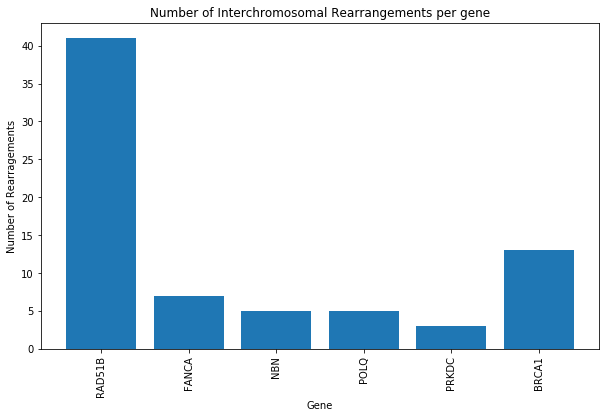

In [8]:
print(forBarPlot)

fig1, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Basic Plot')
x = np.arange(len(labels))
rects = ax.bar(x, forBarPlot)
ax.set_ylabel('Number of Rearragements')
ax.set_xlabel('Gene')
ax.set_title('Number of Interchromosomal Rearrangements per gene')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)